# Random Sample Imputation

Aim : Random Sample Imputation consists of taking random observation from the dataset and we use this observation to replace the Nan values.

**When should it be used?
IT assumes that the data are missing completely at random(MCAR)**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('D:\\Datasets\\titanic.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

# Replacing the Nan values with random values.

In [6]:
# sample() : it picks random value.
# sample(df['Age'].isnull().sum(),random_state=0) : this replaces nan value with random samples.
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [7]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    ## It will have the random sample to fill the nan values.
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## pandas need to have some index in order to merge the dataset.
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample 

In [8]:
# df[df[variable].isnull()].index
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [9]:
## calling impute_nan function
median = df['Age'].median()
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

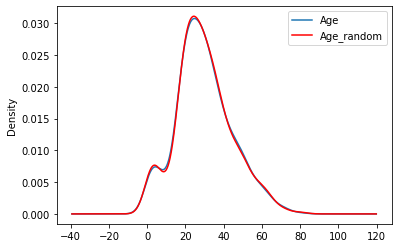

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

***There is no change at all, in mean median mode imputation variance is changing , but here we have the same variance.***

##### Advantages.
1. Easy to Implement.
2. There is less distortion in variance.

##### Disadvantages.
1. Every situation randomness won't work.

# Capturing Nan Values with new Feature.
It works well if the data are not missing completely at random(MNAR)

In [12]:
import numpy as np

In [13]:
df = pd.read_csv('D:/Datasets/titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
df['Age_Nan'] = np.where(df['Age'].isnull(),1,0)

In [15]:
df

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


##### Advantages
Easy to implement
It captures the importance of the missing values.(we can replace the nan value too. and by creating the new feature, The model will knw that whereever there is 1 in age_nan column somehting is happening)
##### Disadvantages
Creating Additional Features.(Curse of Dimensionality)

# End of distribution imputation

It works well if the data are not missing completely at random(MNAR)

In [29]:
df = pd.read_csv('D:\\Datasets\\titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [30]:
# taking the end of the distribution std(+3 std),after the 3rd std.
extreme = df.Age.mean()+3*df.Age.std()
extreme

73.27860964406095

In [31]:
import seaborn as sns

C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

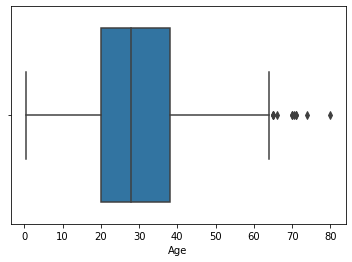

In [32]:
sns.boxplot('Age',data = df)

In [33]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace = True)

In [34]:
impute_nan(df,'Age',df.Age.median(),extreme)
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


C:\Users\sarth\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age_end_distribution'>

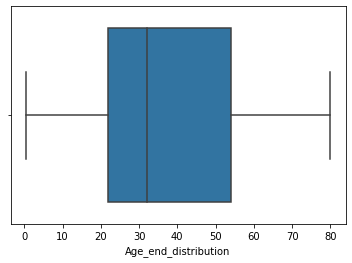

In [35]:
sns.boxplot('Age_end_distribution' ,data = df)

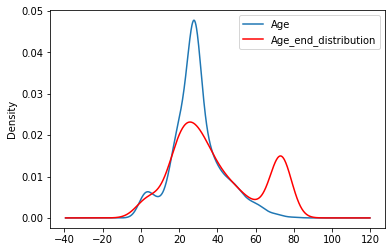

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_end_distribution.plot(kind='kde',ax=ax,color='red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

## Advantages
1. Easy to Implement.
2. Captures the importance of missingness if there is one

## Disadvantages
1. Distorts the original distribution variable
2. If missingness is not important , it may mask the predictive power of the original variable by distorting its distribution.
3. If the number of NA is big, it will mask true outliers in the distribution.
4. if the number of NA is small, the replaced NA may be considered an outlier and pre - processed in a subsequent std feature 
engineering